In [1]:
import numpy as np
import os
from sklearn.metrics import confusion_matrix
import seaborn as sn; sn.set(font_scale=1.4)
from sklearn.utils import shuffle           
import matplotlib.pyplot as plt             
import cv2                                 
import tensorflow as tf                
from tqdm import tqdm


In [2]:
class_names = ['mountain', 'street', 'glacier', 'buildings', 'sea', 'forest']
class_names_label = {class_name:i for i, class_name in enumerate(class_names)}

In [3]:
class_names_label

{'mountain': 0,
 'street': 1,
 'glacier': 2,
 'buildings': 3,
 'sea': 4,
 'forest': 5}

In [4]:
nb_classes = len(class_names)
IMAGE_SIZE = (150, 150)


In [5]:
def load_data():
    datasets = [r"F:\intel image classification\seg_train", r"F:\intel image classification\seg_test"]
    output=[]
    for dataset in datasets:
        images = []
        labels = []
        print("Loading {}".format(dataset))
        for folder in os.listdir(dataset):
            label = class_names_label[folder]
            for file in tqdm(os.listdir(os.path.join(dataset, folder))):
                img_path = os.path.join(os.path.join(dataset, folder), file)
                image = cv2.imread(img_path)
                image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
                image = cv2.resize(image, IMAGE_SIZE)
                images.append(image)
                labels.append(label)
        
        images = np.array(images, dtype = 'float32')
        labels = np.array(labels, dtype = 'int32')   
        output.append((images, labels))
        
    return output
        
            
        
        

In [6]:
(train_images, train_labels), (test_images, test_labels) = load_data()

Loading F:\intel image classification\seg_train


100%|██████████| 2382/2382 [00:08<00:00, 276.59it/s]


Loading F:\intel image classification\seg_test


100%|██████████| 501/501 [00:06<00:00, 81.84it/s] 


In [7]:
print(train_images.shape,train_labels.shape)

(14034, 150, 150, 3) (14034,)


In [8]:
test_images.shape

(3000, 150, 150, 3)

In [9]:
train_images, train_labels = shuffle(train_images, train_labels, random_state=25)

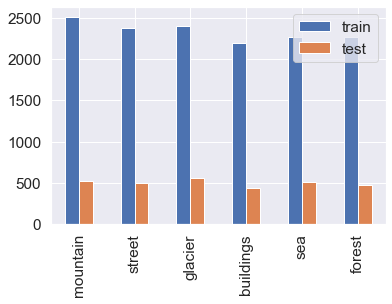

In [11]:
import pandas as pd

_, train_counts = np.unique(train_labels, return_counts=True)
_, test_counts = np.unique(test_labels, return_counts=True)
pd.DataFrame({'train': train_counts,
                    'test': test_counts}, 
             index=class_names
            ).plot.bar()
plt.show()

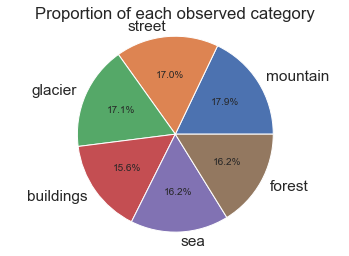

In [12]:
plt.pie(train_counts,
        explode=(0, 0, 0, 0, 0, 0) , 
        labels=class_names,
        autopct='%1.1f%%')
plt.axis('equal')
plt.title('Proportion of each observed category')
plt.show()

In [13]:
train_images = train_images / 255.0 
test_images = test_images / 255.0

In [18]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu', input_shape = (150, 150, 3)), 
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(64, activation=tf.nn.relu),
    tf.keras.layers.Dense(6, activation=tf.nn.softmax)
])

In [19]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])

In [21]:
history = model.fit(train_images, train_labels, batch_size=128, epochs=5, validation_split = 0.2)


Train on 11227 samples, validate on 2807 samples
Epoch 1/5
11227/11227 [==============================] - ETA: 4:14 - loss: 0.7685 - acc: 0.742 - ETA: 3:44 - loss: 0.7266 - acc: 0.750 - ETA: 3:42 - loss: 0.7187 - acc: 0.755 - ETA: 3:36 - loss: 0.7514 - acc: 0.746 - ETA: 3:34 - loss: 0.7724 - acc: 0.728 - ETA: 4:14 - loss: 0.7807 - acc: 0.724 - ETA: 4:54 - loss: 0.7771 - acc: 0.723 - ETA: 4:44 - loss: 0.7705 - acc: 0.721 - ETA: 4:52 - loss: 0.7552 - acc: 0.729 - ETA: 4:43 - loss: 0.7546 - acc: 0.732 - ETA: 4:47 - loss: 0.7519 - acc: 0.733 - ETA: 4:41 - loss: 0.7617 - acc: 0.727 - ETA: 4:31 - loss: 0.7592 - acc: 0.727 - ETA: 4:30 - loss: 0.7620 - acc: 0.727 - ETA: 4:20 - loss: 0.7692 - acc: 0.723 - ETA: 4:11 - loss: 0.7572 - acc: 0.728 - ETA: 4:06 - loss: 0.7519 - acc: 0.728 - ETA: 4:05 - loss: 0.7492 - acc: 0.727 - ETA: 3:59 - loss: 0.7480 - acc: 0.725 - ETA: 3:52 - loss: 0.7452 - acc: 0.725 - ETA: 3:54 - loss: 0.7536 - acc: 0.721 - ETA: 3:48 - loss: 0.7438 - acc: 0.725 - ETA: 3:46 - lo

In [37]:
def plot_accuracy_loss(history):
    fig = plt.figure(figsize=(10,5))
    plt.subplot(221)
    plt.plot(history.history['acc'], label = "acc")
    plt.plot(history.history['val_acc'], label = "val_acc")
    plt.title("train_acc vs val_acc")
    plt.ylabel("accuracy")
    plt.xlabel("epochs")
    plt.legend()
    plt.subplot(222)
    plt.plot(history.history['loss'] ,label = "loss")
    plt.plot(history.history['val_loss'], label = "val_loss")
    plt.title("train_loss vs val_loss")
    plt.ylabel("loss")
    plt.xlabel("epochs")

    plt.legend()
    plt.show()


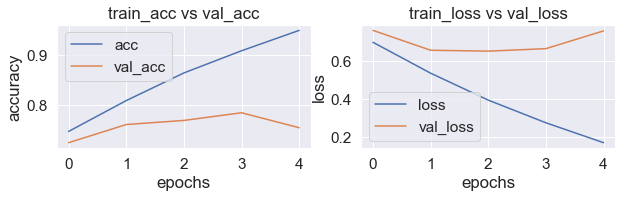

In [38]:
plot_accuracy_loss(history)


In [24]:
test_loss = model.evaluate(test_images, test_labels)

3000/3000 [==============================] - ETA: 59s - loss: 0.4441 - acc: 0.81 - ETA: 39s - loss: 0.4119 - acc: 0.82 - ETA: 34s - loss: 0.5398 - acc: 0.82 - ETA: 30s - loss: 0.5176 - acc: 0.82 - ETA: 30s - loss: 0.4694 - acc: 0.83 - ETA: 30s - loss: 0.4325 - acc: 0.84 - ETA: 30s - loss: 0.4196 - acc: 0.85 - ETA: 32s - loss: 0.4017 - acc: 0.86 - ETA: 32s - loss: 0.4095 - acc: 0.86 - ETA: 31s - loss: 0.4617 - acc: 0.85 - ETA: 30s - loss: 0.4631 - acc: 0.84 - ETA: 30s - loss: 0.4831 - acc: 0.83 - ETA: 29s - loss: 0.4833 - acc: 0.84 - ETA: 28s - loss: 0.5003 - acc: 0.84 - ETA: 27s - loss: 0.4946 - acc: 0.83 - ETA: 26s - loss: 0.4755 - acc: 0.84 - ETA: 26s - loss: 0.4545 - acc: 0.85 - ETA: 26s - loss: 0.4349 - acc: 0.85 - ETA: 26s - loss: 0.4291 - acc: 0.85 - ETA: 26s - loss: 0.4457 - acc: 0.85 - ETA: 26s - loss: 0.4283 - acc: 0.85 - ETA: 25s - loss: 0.4443 - acc: 0.85 - ETA: 25s - loss: 0.4389 - acc: 0.85 - ETA: 24s - loss: 0.4306 - acc: 0.85 - ETA: 24s - loss: 0.4404 - acc: 0.85 - ETA: 

In [25]:
print(test_loss)

[0.7632892011801402, 0.76266664]


In [26]:
predictions = model.predict(test_images)
pred_labels = np.argmax(predictions, axis = 1)

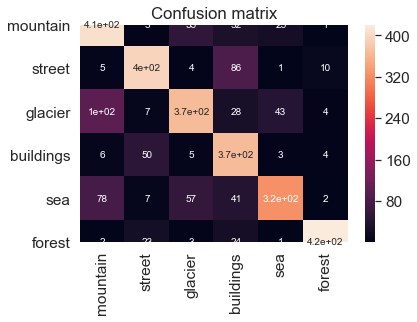

In [30]:
CM = confusion_matrix(test_labels, pred_labels)
ax = plt.axes()
sn.heatmap(CM, annot=True, 
           annot_kws={"size": 10}, 
           xticklabels=class_names, 
           yticklabels=class_names, ax = ax)
ax.set_title('Confusion matrix')
plt.show()


In [56]:
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras import layers
from tensorflow.keras import Model
from tensorflow.keras.optimizers import RMSprop


In [48]:
inception_weight_file=r"F:\pretrained\inception_v3_weights_tf_dim_ordering_tf_kernels_notop_1.h5"

pre_trained_inception=InceptionV3(input_shape=(150,150,3),
                                  include_top=False,
                                  weights=None)
pre_trained_inception.load_weights(inception_weight_file)

In [49]:
for layers in pre_trained_inception.layers:
    layers.trainable=False

In [50]:
pre_trained_inception.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 150, 150, 3) 0                                            
__________________________________________________________________________________________________
conv2d_100 (Conv2D)             (None, 74, 74, 32)   864         input_2[0][0]                    
__________________________________________________________________________________________________
batch_normalization_94 (BatchNo (None, 74, 74, 32)   96          conv2d_100[0][0]                 
__________________________________________________________________________________________________
activation_94 (Activation)      (None, 74, 74, 32)   0           batch_normalization_94[0][0]     
_______________________________________________________________________________________

In [53]:
last_layer = pre_trained_inception.get_layer('mixed9')
print('last layer output shape: ', last_layer.output_shape)
last_output = last_layer.output
print(last_output)

last layer output shape:  (None, 3, 3, 2048)
Tensor("mixed9_2/concat:0", shape=(?, 3, 3, 2048), dtype=float32)


In [58]:
x = layers.Flatten()(last_output)
x = layers.Dense(1024, activation='relu')(x)
x = layers.Dropout(0.2)(x)    
x = layers.Dense(128, activation='relu')(x)
x = layers.Dropout(0.2)(x)    
x = layers.Dense(64, activation='relu')(x)
x = layers.Dropout(0.2)(x)
x = layers.Dense(6, activation='softmax')(x)           

model = Model(pre_trained_inception.input, x) 

model.compile(optimizer = RMSprop(lr=0.0001), 
              loss = 'sparse_categorical_crossentropy', 
              metrics = ['acc'])

history=model.fit(train_images,train_labels,epochs=1,validation_data=(test_images,test_labels))

Train on 14034 samples, validate on 3000 samples
 6496/14034 [============>.................] - ETA: 33:53 - loss: 1.8166 - acc: 0.15 - ETA: 26:52 - loss: 1.7746 - acc: 0.14 - ETA: 24:51 - loss: 1.7715 - acc: 0.15 - ETA: 23:32 - loss: 1.7344 - acc: 0.20 - ETA: 22:39 - loss: 1.6855 - acc: 0.26 - ETA: 22:38 - loss: 1.6689 - acc: 0.28 - ETA: 22:39 - loss: 1.6511 - acc: 0.29 - ETA: 22:49 - loss: 1.6382 - acc: 0.32 - ETA: 22:36 - loss: 1.6217 - acc: 0.33 - ETA: 22:09 - loss: 1.6001 - acc: 0.35 - ETA: 21:43 - loss: 1.5855 - acc: 0.36 - ETA: 22:03 - loss: 1.5685 - acc: 0.36 - ETA: 21:57 - loss: 1.5462 - acc: 0.38 - ETA: 21:36 - loss: 1.5327 - acc: 0.38 - ETA: 21:28 - loss: 1.5361 - acc: 0.39 - ETA: 21:47 - loss: 1.5121 - acc: 0.41 - ETA: 21:50 - loss: 1.4994 - acc: 0.41 - ETA: 21:41 - loss: 1.4906 - acc: 0.41 - ETA: 22:02 - loss: 1.4720 - acc: 0.42 - ETA: 21:43 - loss: 1.4648 - acc: 0.43 - ETA: 21:31 - loss: 1.4528 - acc: 0.43 - ETA: 21:22 - loss: 1.4370 - acc: 0.44 - ETA: 21:08 - loss: 1.423

In [60]:
history.history['loss']

[0.6207736939365952]

In [61]:
history.history['acc']

[0.783882]

In [62]:
history.history['val_loss']

[0.5600308110316594]

In [64]:
history.history['val_acc']

[0.834]